# Stock visualization

In [97]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import math

## Fetching data from yahoo financial

In [98]:
tickers = "SPY AAPL TSLA"

data = yf.download(tickers=tickers, period='1y')to
print(min(data['Low']['AAPL']))
data['Low']['AAPL'].head()
adjclose = data['Adj Close']

#normalize the adjusted closes to see the relative performance of each stock 

normprice = adjclose/adjclose.iloc[0]*100

normprice.plot(figsize=(18,10))

SyntaxError: invalid syntax (<ipython-input-98-27dc3d6aaf61>, line 3)

(array([ 8., 27., 77., 90., 36., 11.,  2.,  0.,  0.,  1.]),
 array([-0.08549851, -0.05730745, -0.02911639, -0.00092533,  0.02726574,
         0.0554568 ,  0.08364786,  0.11183892,  0.14002998,  0.16822105,
         0.19641211]),
 [<matplotlib.patches.Polygon at 0x7fcbf85f30d0>])

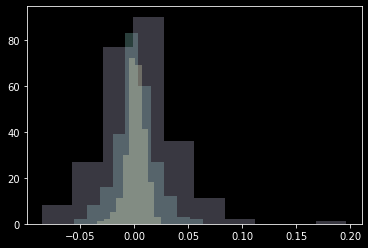

In [99]:
returns = adjclose/adjclose.shift(1) - 1

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=10)
plt.hist(returns['AAPL'], **kwargs)
plt.hist(returns['SPY'], **kwargs)
plt.hist(returns['TSLA'], **kwargs)

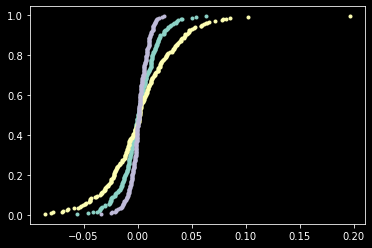

In [100]:
def ecdf(data):
    """Compute ECDF for a one dimensional arrary of measurements"""
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

x, y = ecdf(returns['AAPL'])
plt.plot(x, y, marker='.', linestyle='none')

x, y = ecdf(returns['TSLA'])
plt.plot(x, y, marker='.',linestyle='none')

x, y = ecdf(returns['SPY'])
plt.plot(x, y, marker='.',linestyle='none')

plt.show()

## stock info

In [101]:
tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects

# access each ticker using (example)
tickers.tickers["MSFT"].info['trailingPE']
tickers.tickers["AAPL"].info['trailingPE']
tickers.tickers["GOOG"].info['trailingPE']


30.19634

In [102]:
for key in tickers.tickers:
    print(tickers.tickers.keys())

dict_keys(['MSFT', 'AAPL', 'GOOG'])
dict_keys(['MSFT', 'AAPL', 'GOOG'])
dict_keys(['MSFT', 'AAPL', 'GOOG'])


In [103]:
#import multiprocessing
# multiprocess for Jupyter notebook
import multiprocess  

tickers = yf.Tickers('msft aapl goog')

def getinfo(key):
    return tickers.tickers[key].get_info()
with multiprocess.Pool() as p:
    keys = list(tickers.tickers.keys())
    infos = p.map(getinfo, keys)

In [104]:
infos[2]

{'zip': '94043',
 'sector': 'Communication Services',
 'fullTimeEmployees': 144056,
 'longBusinessSummary': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. The company offers performance and brand advertising services. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, such as ads, Android, Chrome, hardware, Google Maps, Google Play, Search, and YouTube, as well as technical infrastructure; and digital content. The Google Cloud segment offers infrastructure and data analytics platforms, collaboration tools, and other services for enterprise customers. The Other Bets segment sells internet and TV services, as well as licensing and research and development services. The company was founded in 1998 and is headquartered in Mountain View, California.',
 'city': 'Mountain View',
 'phone': '650-253-0000',
 

## stock visualization

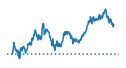

In [11]:
apple = yf.Ticker('AAPL')
history = apple.history(period='1y')
close = history['Close']

#normalize the adjusted closes to see the relative performance of each stock 

normprice = close/close.iloc[0]

low = close.min()
high = close.max()
current = close.iloc[-1]



fig, ax = plt.subplots(figsize=(2,1))

ax.plot(normprice)
ax.axhline(y=1, ls='dotted')

plt.axis('off')
plt.show()

In [12]:
from IPython.display import HTML
import io
import base64

class FlowLayout(object):
    ''' A class / object to display plots in a horizontal / flow layout below a cell '''
    def __init__(self):
        # string buffer for the HTML: initially some CSS; images to be appended
        self.sHtml =  """
        <style>
        .floating-box {
        display: inline-block;
        text-align: center;
        margin: 5px;
        border: 1px solid #888888;  
        }
        </style>
        """

    def add_plot(self, oAxes, ticker):
        ''' Saves a PNG representation of a Matplotlib Axes object '''
        Bio=io.BytesIO() # bytes buffer for the plot
        fig = oAxes.get_figure()
        fig.canvas.print_png(Bio) # make a png of the plot in the buffer

        # encode the bytes as string using base 64 
        sB64Img = base64.b64encode(Bio.getvalue()).decode()
        self.sHtml+= (
            '<div class="floating-box">'+ 
            '<img src="data:image/png;base64,{}\n">'.format(sB64Img)+
            ticker+
            '</div>')

    def PassHtmlToCell(self):
        ''' Final step - display the accumulated HTML '''
        display(HTML(self.sHtml))


In [13]:
SP10 = "AAPL MSFT AMZN FB GOOGL GOOG BRK-B TSLA NVDA JPM"
SP23 = "AAPL MSFT AMZN FB GOOGL GOOG BRK-B TSLA NVDA JPM JNJ V UNH PYPL HD PG MA DIS ADBE BAC CMCSA XOM"
SP30 = "AAPL MSFT AMZN FB GOOGL GOOG BRK-B TSLA NVDA JPM JNJ V UNH PYPL HD PG MA DIS ADBE BAC CMCSA XOM PFE CRM CSCO VZ NFLX KO PEP INTC ABT NKE ABBV TMO ACN T MRK LLY CVX WMT AVGO WFC COST"
mostV = "TLRY PFE BA TDOC TEVA NAOV SPOT DUOL QS CAKE BTBT INFI AUPH SPRT U NEGG FB SNDL HMLP BB FLGC CLF GRVI GNRC BNTX WISH EVGO TLRY.TO MCD"

In [14]:
import time
import datetime
import dateutil 
import yfinance as yf
from finvizfinance.quote import finvizfinance as fv
from finvizfinance.screener.overview import Overview
from finvizfinance.screener.custom import Custom

plt.style.use('dark_background')

def get_startdate(period):
    month_dic = {'1m':1, '3m':3, '6m':6, '1y':12, '2y':24, '3y':36, '5y':60}
    delta = dateutil.relativedelta.relativedelta(months=month_dic[period])
    start = datetime.date.today() - delta
    return start  


class Stocks:
    """ Stocks class for calculating stock stats and 
    visualizing a stock based on the stats.
    
    Attributes:
        tickers (list of str) a list of strings extracted from the tickers
        data (dataframe) representing the historical stock data
        info (nested dictionary) representing each stock's information
        stats (nested dictionary) representing each stock's stats 
            
    """
   
    PERIODS = ['1m', '3m', '1y','2y','5y']
    
    def __init__(self, tickers="",query=None, benchmark="SPY"):
        
        if query is None:
            if type(tickers) == str:
                self.tickers=tickers.split(" ")
            else:
                self.tickers=tickers

            self.stats={}
            for ticker in self.tickers:
                self.stats[ticker]={} 
            self.m_stats = {}

            start = time.time()
            self.load_stocks(tickers, benchmark, Stocks.PERIODS[-1]) 
            print('load stock Time: {} seconds'.format(time.time() - start))
            start = time.time()
            self.calculate_stats(Stocks.PERIODS)
            print('calculate stats Time: {} seconds'.format(time.time() - start))
            start = time.time()
            self.load_info()
            print('load info Time: {} seconds'.format(time.time() - start))
            
        else:
            fcustom = Custom()
            #filters_dict = {'Index':'S&P 500','Country':'USA', 'Performance':'Year +100%' }
            fcustom.set_filter(filters_dict=query)
            start = time.time()
            overview = fcustom.ScreenerView(order = 'Performance (Month)', ascend=False, columns=[0, 1, 2, 3, 6, 7, 42, 43, 65, 66, 67])
            print('load overview Time: {} seconds'.format(time.time() - start))
            print(overview.head())
            self.tickers = overview.Ticker.tolist()
            
            self.stats={}
            for ticker in self.tickers:
                self.stats[ticker]={} 
            self.m_stats = {}
            
        
            start = time.time()
            self.load_stocks(self.tickers, benchmark, Stocks.PERIODS[-1]) 
            print('load stock Time: {} seconds'.format(time.time() - start))
            start = time.time()
            self.calculate_stats(Stocks.PERIODS)
            print('calculate stats Time: {} seconds'.format(time.time() - start))
            start = time.time()
            self.load_info_fromoverview(overview)
            print('load info from overview Time: {} seconds'.format(time.time() - start))
    
    def __repr__(self):
        """function to represent the instance of the stocks"""
        return str([stock +": " + str(info['1y']['performance']) for stock, info in self.stats.items()])
            
    def calculate_stats(self, periods):
        """calcuate performance of each stock on given period and store it to dataframe"""
        for period in periods:
            start = get_startdate(period)
            m_close = self.market[start:]['Adj Close']
            m_returns = np.log(m_close/m_close.shift(1))
            self.m_stats[period] = {'performance': m_close.iloc[-1]/m_close.iloc[0], "volatility":m_returns.std()} 

            close = self.data[start:]['Adj Close']
            low = self.data[start:]['Low']
            high = self.data[start:]['High']
            
            for ticker in self.tickers:       
                #to do : exception process when ticker doesn't exist or only one ticker case

                s_close = close[ticker].dropna()
                s_low = low[ticker].dropna()
                s_high = high[ticker].dropna()
                if (len(s_close)>0):
                    change = s_close.iloc[-1]/s_close.iloc[0]
                    returns = np.log(s_close/ s_close.shift(1))
                    half = int(len(returns)/2)
                    vola1 = returns.iloc[:half].std()
                    vola2 = returns.iloc[half:].std()
                    self.stats[ticker][period] = {'performance':change, 
                                          'volatility1':vola1, 'volatility2':vola2, 
                                         "low":s_low.min(),"high":s_high.max(), "current":s_close.iloc[-1]}
         
            
        
    def load_stocks(self, tickers, benchmark, period='5y'):

        print('downloading benchmark')
        self.market = yf.download(tickers=benchmark, period=period)
        print('downloading stock data')
        self.data = yf.download(tickers=tickers, period=period)   
    
    def load_info(self):
        self.fundamentals = {}
        for ticker in self.tickers:
            try:
                self.fundamentals[ticker] = fv(ticker).TickerFundament()
            except Exception as e:
                self.fundamentals[ticker] = {"P/E":"-"}
                print(e)
    
    def load_info_fromoverview(self, overview):
        self.fundamentals = overview.set_index('Ticker').T.to_dict()

            
    def visualize(self, pallete = 'spring', period='1y'):
        start = time.time()
        oPlot = FlowLayout() # create an empty FlowLayout
        m_perf = self.m_stats[period]["performance"]
        m_vola = self.m_stats[period]["volatility"]
        for ticker, stats in self.stats.items():       
            #height =  math.ceil(stats["performance"]/self.m_stats[period]["performance"])
            fig, ax = plt.subplots(figsize=(1,2))    
            ax.patch.set_facecolor('black')
            self.pillarplot(ax, stats[period]["performance"]/m_perf, 
                            stats[period]["volatility1"]/m_vola,
                            stats[period]["volatility2"]/m_vola, 
                            stats[period]["low"], stats[period]["high"], stats[period]["current"],
                            self.get_color(self.fundamentals[ticker]["P/E"], pallete)
                           ) 

            fig.savefig("stocklookbookapp/static/stocks/"+ticker+"_"+period+".svg", bbox_inches='tight', pad_inches=0.0, format="svg")
            oPlot.add_plot(ax, ticker) # pass it to the FlowLayout to save as an image
            plt.close() # this gets rid of the plot so it doesn't appear in the cell


        oPlot.PassHtmlToCell()
        print('visualizatio Time: {} seconds'.format(time.time() - start))
        
    
    def pillarplot(self, ax, performance, vola1, vola2, low, high, current, color, width=1, height=1):
    
        
        dw, dx1, dy1, dx2, dy2 = self.get_cpoints(vola1, vola2)

        bottom_left = np.array([0,0]) 
        bottom_right = np.array([width,0])
        top_left = bottom_left + [0, height*performance]
        top_right = bottom_right + [0, height*performance]


        c1_left = (bottom_left*3/4 + top_left/4) + [width*dx1,0] -[0, dy1]
        c1_right = (bottom_right*3/4 + top_right/4) - [width*dx1,0] -[0, dy1]

        waist_left = (bottom_left + top_left)/2 + [width*dw,0] 
        waist_right = (bottom_right + top_right)/2 - [width*dw,0]


        c2_left = (bottom_left/4 + top_left*3/4) + [width*dx2, 0] + [0,dy2]
        c2_right = (bottom_right/4 + top_right*3/4) - [width*dx2, 0] + [0,dy2]



        Path = mpath.Path

        codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3,Path.CURVE3, Path.LINETO, Path.CURVE3,Path.CURVE3,Path.CURVE3,Path.CURVE3, Path.CLOSEPOLY]
        vertices = [bottom_left, c1_left, waist_left, c2_left, top_left, top_right, c2_right, waist_right, c1_right, bottom_right, bottom_left]
        
        
        
        pp = mpatches.PathPatch(Path(vertices, codes), color=color, alpha=1)

        ax.add_patch(pp)
        pos = (current-low)/(high-low)*width
        ax.scatter(pos,0, color='w',s=10, zorder=2)

        ax.axis('off')
        ax.set_xlim([-0.25, 1.25])
        ax.set_ylim([-0.1, 3.5])
        ax.set_aspect('equal', 'box')
        #fig.tight_layout()
        
        return
    
    @staticmethod
    def get_cpoints(vola1, vola2):
        """calcaulate the points of quadratic bezier curve based on the volatility of stock"""

        rv1 = (vola1-1)/10
        rv2 = (vola2-1)/10
        LIMIT = 4.8/10


        dx1 = min(rv1, LIMIT)
        dx2 = min(rv2, LIMIT)

        dy = lambda x: 0 if (x < LIMIT) else min(1/(4/LIMIT)*(x-LIMIT), 1/4)
        dy1 = dy(rv1)
        dy2 = dy(rv2)

        w = (dx1+dx2)/2

        return w, dx1, dy1, dx2, dy2
    
    
    @staticmethod
    def get_color(PE, pallete):
        """get a color to represent P/E ratio"""
        cm = plt.get_cmap(pallete)
        
        try:
            num = float(PE)/100
            if np.isnan(num):
                color = (0.7, 0.7, 0.7)
            else:
                color = cm(num)
        except:    
            color = (0.7, 0.7, 0.7)
                      
        return color
        
    #def add_stocks(tickers):
        

downloading benchmark
[*********************100%***********************]  1 of 1 completed
downloading stock data
[*********************100%***********************]  29 of 29 completed
load stock Time: 1.5436770915985107 seconds
calculate stats Time: 0.27510690689086914 seconds
404 Client Error: Not Found for url: https://finviz.com/quote.ashx?t=SPRT
404 Client Error: Not Found for url: https://finviz.com/quote.ashx?t=TLRY.TO
load info Time: 7.631693124771118 seconds



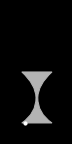
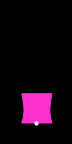
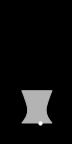
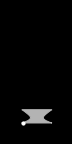
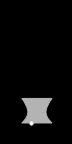
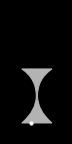
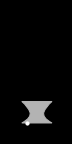
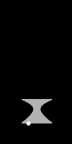
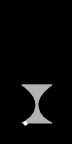
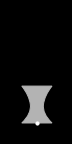
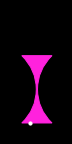
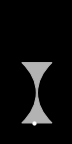
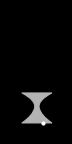
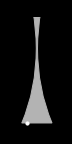
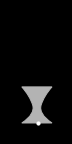
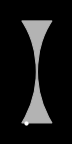
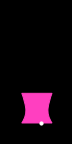
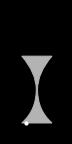
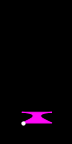
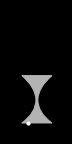
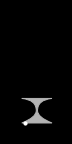
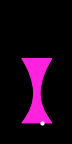
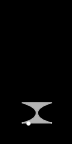
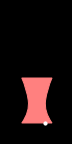
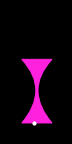
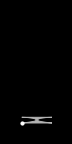
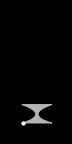
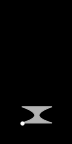
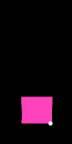

visualizatio Time: 1.187621831893921 seconds


In [15]:
mv = Stocks(tickers=mostV)
mv.visualize()

In [18]:
mv.data['Adj Close']['BA']

Date
2016-10-06    123.676834
2016-10-07    123.152420
2016-10-10    124.983345
2016-10-11    123.051186
2016-10-12    122.517548
                 ...    
2021-09-30    219.940002
2021-10-01    226.000000
2021-10-04    223.789993
2021-10-05    224.419998
2021-10-06    224.050003
Name: BA, Length: 1261, dtype: float64

In [35]:
selected = mv.data.stack(level=[1]).reset_index()[['Date', 'level_1', 'Adj Close']]
selected.columns = ['Date', 'Ticker', 'Price']
 np.log(selected.Price/selected.Price.shift(1))

,Date,Ticker,Price,Return
0,2016-10-06,AUPH,5.100000,NaN
1,2016-10-06,BA,123.676834,3.188431
2,2016-10-06,BB,7.940000,-2.745759
3,2016-10-06,CAKE,45.097214,1.736907
4,2016-10-06,CLF,5.283865,-2.144163
...,...,...,...,...
24760,2021-10-06,TEVA,9.825000,-2.551422
24761,2021-10-06,TLRY,10.875000,0.101536
24762,2021-10-06,TLRY.TO,13.700000,0.230929
24763,2021-10-06,U,129.990005,2.250062


In [93]:
df.columns.levels[0]

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [96]:
returns = np.log(df['Adj Close']/df['Adj Close'].shift(1))
returns.columns = pd.MultiIndex.from_product([['Return'], returns.columns])
concated = pd.concat([df, returns], axis=1)
print(concated.tail())

selected = concated.stack(level=[1]).reset_index()[['Date', 'level_1', 'Adj Close', 'Return']]
selected.columns = ['date', 'ticker', 'price', 'returns']
start = time.time()
selected.to_sql('histories', db.engine, if_exists='replace')
print("to sql time:"time.time() - start)
print(pd.read_sql('histories', db.engine))

Adj Close                                                    \
                 AUPH          BA      BB        BNTX   BTBT       CAKE   
Date                                                                      
2016-10-06   5.100000  123.676834  7.9400         NaN    NaN  45.097214   
2016-10-07   4.700000  123.152420  7.8600         NaN    NaN  45.917004   
2016-10-10   4.750000  124.983345  7.8900         NaN    NaN  46.900745   
2016-10-11   4.470000  123.051186  7.6700         NaN    NaN  46.427082   
2016-10-12   4.280000  122.517548  7.6000         NaN    NaN  46.918945   
...               ...         ...     ...         ...    ...        ...   
2021-09-30  22.129999  219.940002  9.7300  272.989990   7.23  47.000000   
2021-10-01  21.809999  226.000000  9.7000  254.789993   8.07  49.389999   
2021-10-04  21.090000  223.789993  9.6000  248.899994   7.59  48.439999   
2021-10-05  21.280001  224.419998  9.5200  250.119995  10.35  46.630001   
2021-10-06  19.891600  224.050003  9.3801  236.970001  11.69  46.930000   

                                                       ...   Returns  \
                  CLF        DUOL    EVGO          FB  ...        QS   
Date                                                   ...             
2016-10-06   5.283865         NaN     NaN  128.740005  ...       NaN   
2016-10-07   5.302804         NaN     NaN  128.990005  ...       NaN   
2016-10-10   5.416436         NaN     NaN  130.240005  ...       NaN   
2016-10-11   5.283865         NaN     NaN  128.880005  ...       NaN   
2016-10-12   5.425905         NaN     NaN  129.050003  ...       NaN   
...               ...         ...     ...         ...  ...       ...   
2021-09-30  19.809999  166.360001  8.1500  339.390015  ...  0.963865   
2021-10-01  19.660000  160.580002  8.2800  343.010010  ...  0.998777   
2021-10-04  19.830000  150.869995  7.9500  326.230011  ...  0.936760   
2021-10-05  20.760000  144.850006  8.0800  332.959991  ...  0.985192   
2021-10-06  20.243500  137.414993  7.8817  333.764404  ...  1.004421   

                                                                        \
                SNDL      SPOT      SPRT      TDOC      TEVA      TLRY   
Date                                                                     
2016-10-06       NaN       NaN       NaN       NaN       NaN       NaN   
2016-10-07       NaN       NaN  1.011976  1.009064  0.992511       NaN   
2016-10-10       NaN       NaN  0.993964  1.025150  0.999556       NaN   
2016-10-11       NaN       NaN  0.982260  0.962617  0.989343       NaN   
2016-10-12       NaN       NaN  1.000000  0.989684  0.990126       NaN   
...              ...       ...       ...       ...       ...       ...   
2021-09-30  1.002959  1.022785       NaN  1.007068  0.976931  1.016202   
2021-10-01  0.988201  1.017707       NaN  0.999211  0.995893  0.987600   
2021-10-04  0.940298  0.967645       NaN  0.965985  0.991753  0.963229   
2021-10-05  1.017460  1.017620       NaN  1.015686  1.011434  1.033520   
2021-10-06  0.997660  1.028873       NaN  1.013585  1.009764  0.979730   

                                          
             TLRY.TO         U      WISH  
Date                                      
2016-10-06       NaN       NaN       NaN  
2016-10-07       NaN       NaN       NaN  
2016-10-10       NaN       NaN       NaN  
2016-10-11       NaN       NaN       NaN  
2016-10-12       NaN       NaN       NaN  
...              ...       ...       ...  
2021-09-30  1.011283  1.003338  0.976744  
2021-10-01  0.983961  0.999762  0.979853  
2021-10-04  0.958894  0.949533  0.906542  
2021-10-05  1.031781  1.068419  0.985567  
2021-10-06  0.981375  1.015150  1.035983  

[1261 rows x 203 columns]

load overview Time: 1.5158379077911377 seconds#####] 3/3 
  Ticker                              Company       Sector    Market Cap  P/E  \
0   ATER                        Aterian, Inc.   Technology  3.762300e+08  NaN   
1   AFRM                Affirm Holdings, Inc.   Technology  3.193000e+10  NaN   
2   SNMP  Evolve Transition Infrastructure LP       Energy  7.079000e+07  NaN   
3    DNN                  Denison Mines Corp.       Energy  1.210000e+09  NaN   
4   SHIP     Seanergy Maritime Holdings Corp.  Industrials  2.541800e+08  NaN   

   Perf Week  Perf Month   Price  Change      Volume  
0    -0.1254      0.8701    9.91 -0.1284  16712768.0  
1     0.0593      0.6866  112.66 -0.0162  15875611.0  
2     0.4020      0.3003    1.14 -0.0947  15518588.0  
3    -0.0213      0.2212    1.36 -0.0181  11546011.0  
4     0.1333      0.2143    1.43 -0.0654  18139941.0  
downloading benchmark
[*********************100%***********************]  1 of 1 completed
downloading stock data
[**********


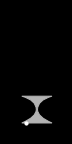
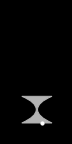
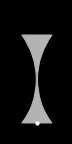
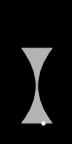
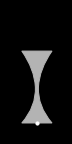
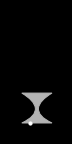
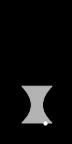
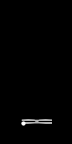
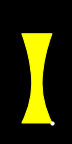
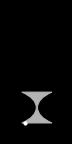
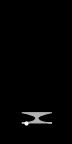
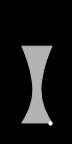
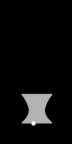
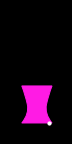
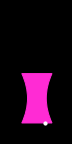
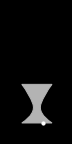
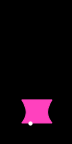
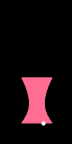
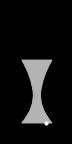
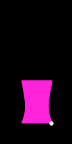
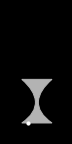
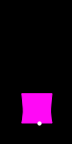
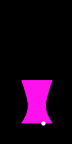
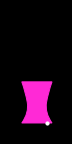
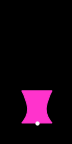
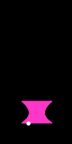
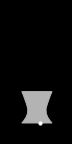
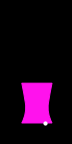
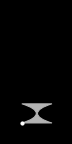
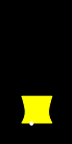
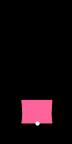
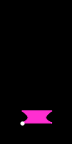
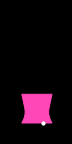
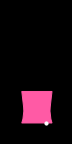
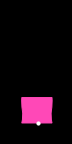
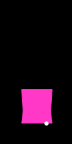
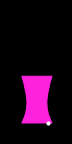
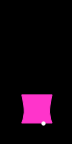
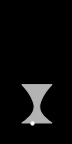
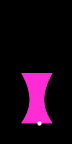
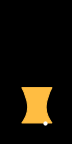
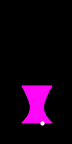
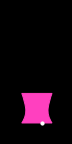
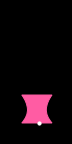
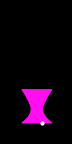
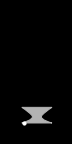
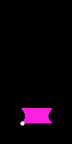
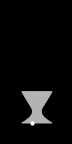
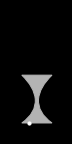
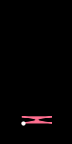
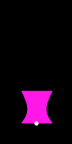
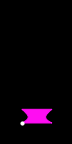
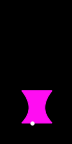
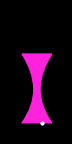
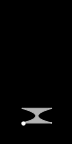
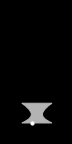
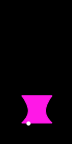
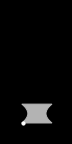
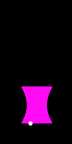

visualizatio Time: 2.914829969406128 seconds


In [44]:
trendings = Stocks(query={'Analyst Recom.':'Buy or better','Current Volume':'Over 10M','Average Volume':'Over 2M', 'Relative Volume':'Over 0.5'})

trendings.visualize('spring')

In [37]:
query = {'Analyst Recom.':'Buy or better', 'Current Volume':'Over 10M', 'Average Volume':'Over 2M', 'Relative Volume':'Over 0.5'}
fcustom = Custom()
fcustom.set_filter(filters_dict=query)
overview = fcustom.ScreenerView(order='Performance (Month)', ascend=False,
                                columns=[0, 1, 2, 3, 6, 7, 42, 43, 65, 66, 67])


,Ticker,Company,Sector,Market Cap,P/E,Perf Week,Perf Month,Price,Change,Volume
0,ATER,"Aterian, Inc.",Technology,4.119700e+08,NaN,0.0614,2.0145,11.41,-0.0835,15653608.0
1,AFRM,"Affirm Holdings, Inc.",Technology,3.579000e+10,NaN,0.1919,0.8344,117.00,-0.0886,10921369.0
2,KOS,Kosmos Energy Ltd.,Energy,1.180000e+09,NaN,0.3216,0.3889,3.10,0.0336,14080744.0
3,DNN,Denison Mines Corp.,Energy,1.260000e+09,NaN,0.0213,0.3333,1.39,-0.0347,13427433.0
4,SNMP,Evolve Transition Infrastructure LP,Energy,6.967000e+07,NaN,0.4091,0.3319,1.34,0.0806,10819581.0


In [49]:
# imports string module
import string
 
sentence = 'top-losers'
 
# sep parameter is left None
formatted = string.capwords(sentence, sep = '-').replace('-','')
 
print(formatted)

TopLosers


In [26]:
trends = set(trendings.tickers)
ts.update(trends)
ts

{'AA',
 'AAPL',
 'AFRM',
 'AMD',
 'APA',
 'ATER',
 'ATVI',
 'AUPH',
 'BA',
 'BABA',
 'BAC',
 'BB',
 'BBD',
 'BEKE',
 'BNTX',
 'BP',
 'BTBT',
 'C',
 'CAKE',
 'CCL',
 'CIDM',
 'CLF',
 'CMCSA',
 'COP',
 'CRVS',
 'CSCO',
 'CVE',
 'CVX',
 'CX',
 'DAL',
 'DIS',
 'DKNG',
 'DNN',
 'DUOL',
 'DVAX',
 'DVN',
 'EDU',
 'ET',
 'EVGO',
 'F',
 'FB',
 'FCX',
 'FDX',
 'FLGC',
 'GE',
 'GGB',
 'GM',
 'GNRC',
 'GOLD',
 'GRVI',
 'HBAN',
 'HMLP',
 'HOOD',
 'INFI',
 'ITUB',
 'JPM',
 'KGC',
 'KO',
 'LPTX',
 'LVS',
 'MCD',
 'MGM',
 'MRO',
 'MSFT',
 'MU',
 'NAOV',
 'NCLH',
 'NEGG',
 'NIO',
 'NLY',
 'NNDM',
 'NOK',
 'NVDA',
 'OPEN',
 'PBR',
 'PCG',
 'PFE',
 'PLUG',
 'PTON',
 'QS',
 'RWLK',
 'SAVA',
 'SESN',
 'SIRI',
 'SKLZ',
 'SLB',
 'SNAP',
 'SNDL',
 'SOFI',
 'SPOT',
 'SPRT',
 'TDOC',
 'TEVA',
 'TLRY',
 'TLRY.TO',
 'TME',
 'TNXP',
 'U',
 'UBER',
 'VALE',
 'VICI',
 'VIPS',
 'WFC',
 'WISH',
 'ZNGA'}

In [9]:
usa = Stocks(query={'Index':'S&P 500'})
usa.tickers

load overview Time: 8.570163011550903 seconds######] 26/26 
downloading benchmark
[*********************100%***********************]  1 of 1 completed
downloading stock data
[*********************100%***********************]  505 of 505 completed
load stock Time: 27.06856894493103 seconds
calculate stats Time: 4.053231239318848 seconds
load info from overview Time: 0.07501792907714844 seconds


['COG',
 'CZR',
 'PWR',
 'APA',
 'FANG',
 'OXY',
 'BKR',
 'ETSY',
 'BKNG',
 'PENN',
 'MRNA',
 'DVN',
 'CTLT',
 'LUMN',
 'NTAP',
 'EOG',
 'EXPE',
 'KMX',
 'TECH',
 'CF',
 'NOW',
 'DXCM',
 'KLAC',
 'BAX',
 'MAR',
 'MGM',
 'FTI',
 'LYV',
 'PRGO',
 'NCLH',
 'COP',
 'HST',
 'MOS',
 'DRI',
 'AAL',
 'MCHP',
 'RCL',
 'TSLA',
 'SIVB',
 'HLT',
 'HAL',
 'CTXS',
 'OKE',
 'DAL',
 'MRO',
 'GNRC',
 'CCL',
 'TMO',
 'NOV',
 'FMC',
 'NVDA',
 'IR',
 'PXD',
 'HES',
 'PAYC',
 'NFLX',
 'WLTW',
 'ALK',
 'TSCO',
 'WY',
 'MPC',
 'AMZN',
 'XLNX',
 'CDNS',
 'REG',
 'AMAT',
 'ZION',
 'BDX',
 'VLO',
 'WMB',
 'AVGO',
 'LUV',
 'ALGN',
 'AON',
 'KEYS',
 'TDG',
 'ODFL',
 'ABMD',
 'TXN',
 'MSCI',
 'HIG',
 'VRSK',
 'VTR',
 'INFO',
 'HCA',
 'FOX',
 'FITB',
 'DIS',
 'SLB',
 'UAL',
 'CRL',
 'CBRE',
 'IT',
 'MU',
 'AJG',
 'FOXA',
 'CPRT',
 'HD',
 'SPGI',
 'LVS',
 'ULTA',
 'IVZ',
 'FRT',
 'ABC',
 'GOOGL',
 'LRCX',
 'A',
 'EXR',
 'CRM',
 'ADM',
 'INTU',
 'RSG',
 'TER',
 'WELL',
 'EQIX',
 'FFIV',
 'EXC',
 'INCY',
 'XOM',
 'WBA

In [ ]:
usa.tickers

In [ ]:
fstocks.visualize('viridis')

In [ ]:
fstocks.visualize('Wistia_r')

In [ ]:
fstocks.visualize('tab20b')

## Creating a database with SQLAlchemy

In [ ]:
pip install sqlalchemy

In [ ]:
trendings

In [109]:
#Configuration

import sys
from sqlalchemy import Column, ForeignKey, Integer, String, Float, Date
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship, sessionmaker
from sqlalchemy import create_engine


Base = declarative_base()




#Class and Table

class StockInfo(Base):
    __tablename__ = 'stock_info'
    ticker = Column(String(10), primary_key=True)
    name = Column(String(250), nullable=False)
    
    
    
    
    
class History(Base):
    __tablename__ = 'history'
    
    id = Column(Integer, primanry_key=True)
    date = Column(Date, nullable=False)
    ticker = Column(String(10), ForeignKey('stock_info.ticker'))
    price = Column(Float , nullable=True)
    stock_info = relationship(StockInfo)
    



engine = create_engine('sqlite:///stocksn.db')
Base.metadata.create_all(engine)

<ipython-input-109-18cb472db204>:29: SAWarning: Can't validate argument 'primanry_key'; can't locate any SQLAlchemy dialect named 'primanry'
  id = Column(Integer, primanry_key=True)


ArgumentError: Mapper mapped class History->history could not assemble any primary key columns for mapped table 'history'

In [ ]:
trendings.data.columns.get_level_values(0).unique()

In [ ]:
DBSession = sessionmaker(bind = engine)
session = DBSession()

In [ ]:
firstResult = session.query(text(close)).first()

In [ ]:
df = trendings.data

In [ ]:
trendings.data.to_sql('stocks', engine, dtype={'date':Date, 'ticker':String(8), 'price':Float, 'volumne':Integer})

In [ ]:
df = trendings.data
selected = df.stack(level=[1]).reset_index()[['Date', 'level_1', 'Adj Close']]
selected.columns = ['Date', 'Ticker', 'Price']
selected.to_sql('history', engine, if_exists = 'replace')

In [ ]:
df.columns.get_level_values(1)

In [ ]:
reset_df.head()

In [106]:
df.to_sql('history', engine, if_exists = 'replace')

NameError: name 'engine' is not defined

In [ ]:
engine.execute('SELECT DATE, AAPL FROM close LIMIT 10 WHERE AAPL OVER 140').fetchall()

# portfolio Optimization

The following single line of code generates a random array of weights that sum to 1.0. In the portfolio, one of the assumptions is that all funds will deployed to the assets in the portfolio according to some weighting.

In [ ]:
weights = np.random.dirichlet(np.ones(6), size=1)
weights = weights[0]
print(weights)

From these weights, we can calculate the expected weighted return of the portfolio of assets using these random weights.

In [ ]:
exp_port_return = np.sum(returns.mean()*weights)*252
print('portfolio mean: ',exp_port_return)

In [ ]:
np.dot(returns.cov()*252, weights)

In [ ]:
port_var = np.dot(weights.T, np.dot(returns.cov()*252, weights))
port_vol = np.sqrt(port_var)
print(port_var)
print('portfolio volatility: ', port_vol)

In [ ]:
import time

def portfolio_simulation(assets, startdate, iterations):
    '''
    Runs a simulation by randomly selecting portfolio weights a specified
    number of times (iterations), returns the list of results and plots 
    all the portfolios as well.
    
    Parameters:
    -----------  
        assets: list
            all the assets that are to be pulled from Quandl to comprise
            our portfolio.    
        iterations: int 
            the number of randomly generated portfolios to build.
    
    Returns:
    --------
        port_returns: array
            array of all the simulated portfolio returns.
        port_vols: array
            array of all the simulated portfolio volatilities.
    '''
    
    start = time.time()
    num_assets = len(assets.split())
    
    data = yf.download(tickers=assets, start=startdate)
    acp = data['Adj Close']
    returns = np.log(acp/acp.shift(1))
    
    port_returns = []
    port_volats = []
    
    for i in range(iterations):
        weights = np.random.dirichlet(np.ones(num_assets), size=1)
        weights = weights[0]
        port_returns.append(np.sum(returns.mean()*weights) * 252)
        port_volats.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))
        
    port_returns = np.array(port_returns)
    port_volats = np.array(port_volats)
    
    plt.figure(figsize=(18,10))
    plt.scatter(port_volats, port_returns, c=port_returns/port_volats, marker='o')
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.xlabel('Portfolio Volatility')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label = 'Sharpe ratio')
    
    print('Elapsed Time: {} seconds'.format(time.time() - start))

        print('Elapsed Time: {} seconds'.format(time.time() - start))

    return port_returns, port_volats
    

    

In [ ]:
assets = "SPY AAPL MSFT QQQ VWO GLD"
startdate = "2015-01-01"

In [ ]:
portfolio_simulation(assets, startdate, 5000)

In [ ]:
def portfolio_stats(weights):
    '''
    We can gather the portfolio performance metrics for a specific set of weights.
    This function will be important because we'll want to pass it to an optmization
    function to get the portfolio with the best desired characteristics.
    
    Note: Sharpe ratio here uses a risk-free short rate of 0.
    
    Paramaters: 
    -----------
        weights: array, 
            asset weights in the portfolio.
        returns: dataframe
            a dataframe of returns for each asset in the trial portfolio    
    
    Returns: 
    --------
        dict of portfolio statistics - mean return, volatility, sharp ratio.
    '''
    
    # Convert to array in case list was passed instead.
    weights = np.array(weights)
    port_return = np.sum(returns.mean()*weights)*252
    port_volat = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    sharpe = port_return/port_volat
    
    return {'return': port_return, 'volatility':port_volat, 'sharpe':sharpe}

## Minimization Functions


In [ ]:
def minimize_sharpe(weights):  
    return -portfolio_stats(weights)['sharpe'] 

def minimize_volatility(weights):  
    # Note that we don't return the negative of volatility here because we 
    # want the absolute value of volatility to shrink, unlike sharpe.
    return portfolio_stats(weights)['volatility'] 

def minimize_return(weights): 
    return -portfolio_stats(weights)['return']

## The Optimization Function

The scipy.optimize function accepts several parameters in order to optimize on your desired variable. Some of these are especially important in the portfolio optimization process.

- constraints: In this case, our key constraint is that all the portfolio weights should sum to 1.0. What this means, practically, is that all of our cash should be invested in an asset or ETF.
- bounds: Bounds is going to refer to how much of our portfolio one asset can take up, from 0.0 to 1.0. 0.0 being a 0% position, and 1.0 being a 100% position (That stock or ETF is our only holding). Note that we can change this if we want so that we don’t take on too much concentration risk. Concentration risk is the loss of diversification benefits you can encouter if one stock or ETF takes up too much of your portfolio. In reality, you might want to set these bounds to (0, 0.2), which means a single stock can only take up a maximum of 20% of the portfolio.
- initializer: Initializer just sets the initial weights of the optimization algorithm so that it has a starting point. Here we’ll just set them so that each stock takes up an equal percentage of the portfolio.

In [ ]:
num_assets = 6
constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0,1) for x in range(num_assets))
initializer = num_assets * [1./num_assets,]

print (initializer)
print (bounds)

In [ ]:
import scipy.optimize as optimize
optimal_sharpe=optimize.minimize(minimize_sharpe,
                                 initializer,
                                 method = 'SLSQP',
                                 bounds = bounds,
                                 constraints = constraints)
print(optimal_sharpe)

In [ ]:
optimal_sharpe_weights=optimal_sharpe['x'].round(4)
list(zip(assets,list(optimal_sharpe_weights)))

In [ ]:
optimal_stats = portfolio_stats(optimal_sharpe_weights)
print(optimal_stats)

print('Optimal Portfolio Return: ', round(optimal_stats['return']*100,4))
print('Optimal Portfolio Volatility: ', round(optimal_stats['volatility']*100,4))
print('Optimal Portfolio Sharpe Ratio: ', round(optimal_stats['sharpe'],4))

In [ ]:
df = px.data.stocks(indexed=True) - 1
fig = px.area(df, facet_col="company", facet_col_wrap=3)
fig.show()

In [ ]:
# Using plotly.express
import plotly.express as px

fig = px.line(adjclose)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = px.line(df, x='Date', y='AAPL.High', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

# references

https://kevinvecmanis.io/finance/optimization/2019/04/02/Algorithmic-Portfolio-Optimization.html

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# Yahoo! Finance market data downloader (+fix for Pandas Datareader)
# https://github.com/ranaroussi/yfinance
#
# Copyright 2017-2019 Ran Aroussi
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

from __future__ import print_function

import requests as _requests
import re as _re
import pandas as _pd
import numpy as _np
import sys as _sys
import re as _re

try:
    import ujson as _json
except ImportError:
    import json as _json


user_agent_headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

def empty_df(index=[]):
    empty = _pd.DataFrame(index=index, data={
        'Open': _np.nan, 'High': _np.nan, 'Low': _np.nan,
        'Close': _np.nan, 'Adj Close': _np.nan, 'Volume': _np.nan})
    empty.index.name = 'Date'
    return empty


def get_html(url, proxy=None, session=None):
    session = session or _requests
    html = session.get(url=url, proxies=proxy, headers=user_agent_headers).text
    return html


def get_json(url, proxy=None, session=None):

    session = session or _requests
    start = time.time()
    html = session.get(url=url, proxies=proxy, headers=user_agent_headers).text
    if "QuoteSummaryStore" not in html:
        html = session.get(url=url, proxies=proxy).text
     
        if "QuoteSummaryStore" not in html:
            return {}

    json_str = html.split('root.App.main =')[1].split(
        '(this)')[0].split(';\n}')[0].strip()
    
    data = _json.loads(json_str)[
        'context']['dispatcher']['stores']['QuoteSummaryStore']
    # return data
    new_data = _json.dumps(data).replace('{}', 'null')
    new_data = _re.sub(
        r'\{[\'|\"]raw[\'|\"]:(.*?),(.*?)\}', r'\1', new_data)
    
    return _json.loads(new_data)


def camel2title(o):
    return [_re.sub("([a-z])([A-Z])", r"\g<1> \g<2>", i).title() for i in o]


def auto_adjust(data):
    df = data.copy()
    ratio = df["Close"] / df["Adj Close"]
    df["Adj Open"] = df["Open"] / ratio
    df["Adj High"] = df["High"] / ratio
    df["Adj Low"] = df["Low"] / ratio

    df.drop(
        ["Open", "High", "Low", "Close"],
        axis=1, inplace=True)

    df.rename(columns={
        "Adj Open": "Open", "Adj High": "High",
        "Adj Low": "Low", "Adj Close": "Close"
    }, inplace=True)

    df = df[["Open", "High", "Low", "Close", "Volume"]]
    return df[["Open", "High", "Low", "Close", "Volume"]]


def back_adjust(data):
    """ back-adjusted data to mimic true historical prices """

    df = data.copy()
    ratio = df["Adj Close"] / df["Close"]
    df["Adj Open"] = df["Open"] * ratio
    df["Adj High"] = df["High"] * ratio
    df["Adj Low"] = df["Low"] * ratio

    df.drop(
        ["Open", "High", "Low", "Adj Close"],
        axis=1, inplace=True)

    df.rename(columns={
        "Adj Open": "Open", "Adj High": "High",
        "Adj Low": "Low"
    }, inplace=True)

    return df[["Open", "High", "Low", "Close", "Volume"]]


def parse_quotes(data, tz=None):
    timestamps = data["timestamp"]
    ohlc = data["indicators"]["quote"][0]
    volumes = ohlc["volume"]
    opens = ohlc["open"]
    closes = ohlc["close"]
    lows = ohlc["low"]
    highs = ohlc["high"]

    adjclose = closes
    if "adjclose" in data["indicators"]:
        adjclose = data["indicators"]["adjclose"][0]["adjclose"]

    quotes = _pd.DataFrame({"Open": opens,
                            "High": highs,
                            "Low": lows,
                            "Close": closes,
                            "Adj Close": adjclose,
                            "Volume": volumes})

    quotes.index = _pd.to_datetime(timestamps, unit="s")
    quotes.sort_index(inplace=True)

    if tz is not None:
        quotes.index = quotes.index.tz_localize(tz)

    return quotes


def parse_actions(data, tz=None):
    dividends = _pd.DataFrame(columns=["Dividends"])
    splits = _pd.DataFrame(columns=["Stock Splits"])

    if "events" in data:
        if "dividends" in data["events"]:
            dividends = _pd.DataFrame(
                data=list(data["events"]["dividends"].values()))
            dividends.set_index("date", inplace=True)
            dividends.index = _pd.to_datetime(dividends.index, unit="s")
            dividends.sort_index(inplace=True)
            if tz is not None:
                dividends.index = dividends.index.tz_localize(tz)

            dividends.columns = ["Dividends"]

        if "splits" in data["events"]:
            splits = _pd.DataFrame(
                data=list(data["events"]["splits"].values()))
            splits.set_index("date", inplace=True)
            splits.index = _pd.to_datetime(splits.index, unit="s")
            splits.sort_index(inplace=True)
            if tz is not None:
                splits.index = splits.index.tz_localize(tz)
            splits["Stock Splits"] = splits["numerator"] / \
                splits["denominator"]
            splits = splits["Stock Splits"]

    return dividends, splits


class ProgressBar:
    def __init__(self, iterations, text='completed'):
        self.text = text
        self.iterations = iterations
        self.prog_bar = '[]'
        self.fill_char = '*'
        self.width = 50
        self.__update_amount(0)
        self.elapsed = 1

    def completed(self):
        if self.elapsed > self.iterations:
            self.elapsed = self.iterations
        self.update_iteration(1)
        print('\r' + str(self), end='')
        _sys.stdout.flush()
        print()

    def animate(self, iteration=None):
        if iteration is None:
            self.elapsed += 1
            iteration = self.elapsed
        else:
            self.elapsed += iteration

        print('\r' + str(self), end='')
        _sys.stdout.flush()
        self.update_iteration()

    def update_iteration(self, val=None):
        val = val if val is not None else self.elapsed / float(self.iterations)
        self.__update_amount(val * 100.0)
        self.prog_bar += '  %s of %s %s' % (
            self.elapsed, self.iterations, self.text)

    def __update_amount(self, new_amount):
        percent_done = int(round((new_amount / 100.0) * 100.0))
        all_full = self.width - 2
        num_hashes = int(round((percent_done / 100.0) * all_full))
        self.prog_bar = '[' + self.fill_char * \
            num_hashes + ' ' * (all_full - num_hashes) + ']'
        pct_place = (len(self.prog_bar) // 2) - len(str(percent_done))
        pct_string = '%d%%' % percent_done
        self.prog_bar = self.prog_bar[0:pct_place] + \
            (pct_string + self.prog_bar[pct_place + len(pct_string):])

    def __str__(self):
        return str(self.prog_bar)

In [ ]:
ap = TickerBase('AAPL')
ap.get_info()

In [ ]:
get_json('https://finance.yahoo.com/quote/AAPL')

In [ ]:
base = 'https://finance.yahoo.com/quote/'
info = {}
with multiprocessing.Pool() as p:
    for key in ['AAPL','MSFT', 'GOOGL']:
        infos = p.map(get_json, base+key)

In [ ]:
infos(0)

In [ ]:
import http.client

conn = http.client.HTTPSConnection("apidojo-yahoo-finance-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "e71460c88cmsh80ec8df46a33373p1464d5jsn538bf9eaf0f6"
    }

conn.request("GET", "/stock/v2/get-summary?symbol=AMRN&region=US", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

In [ ]:
import http.client

conn = http.client.HTTPSConnection("apidojo-yahoo-finance-v1.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "e71460c88cmsh80ec8df46a33373p1464d5jsn538bf9eaf0f6"
    }

conn.request("GET", "/market/get-trending-tickers?region=US", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

In [ ]:
import pandas as pd

stock = fv('tsla')
info = stock.TickerFundament()

In [ ]:
from finvizfinance.screener.overview import Overview
from finvizfinance.screener.custom import Custom

#foverview = Overview()
fcustom = Custom()
filters_dict = {'Index':'S&P 500','Country':'USA', 'Performance':'Year +100%' }
#foverview.set_filter(filters_dict=filters_dict)
#df = foverview.ScreenerView()
fcustom.set_filter(filters_dict=filters_dict)
df = fcustom.ScreenerView(order = 'Performance (Month)', ascend=False, columns=[0, 1, 2, 3, 6, 7, 42, 43, 65, 66, 67])
df.head()

tickers = df.Ticker.tolist()
perf_stocks = Stocks(tickers, benchmark='SPY', overview=df)
perf_stocks.visualize()

In [ ]:
float(perf_stocks.fundamentals['FANG']['P/E'])

In [ ]:
df.set_index('Ticker').T.to_dict()

In [ ]:
columns = {
    0: 'No.',
    1: 'Ticker',
    2: 'Company',
    3: 'Sector',
    4: 'Industry',
    5: 'Country',
    6: 'Market Cap.',
    7: 'P/E',
    8: 'Forward P/E',
    9: 'PEG',
    10: 'P/S',
    11: 'P/B',
    12: 'P/Cash',
    13: 'P/Free Cash Flow',
    14: 'Dividend Yield',
    15: 'Payout Ratio',
    16: 'EPS',
    17: 'EPS growth this year',
    18: 'EPS growth next year',
    19: 'EPS growth past 5 years',
    20: 'EPS growth next 5 years',
    21: 'Sales growth past 5 years',
    22: 'EPS growth qtr over qtr',
    23: 'Sales growth qtr over qtr',
    24: 'Shares Outstanding',
    25: 'Shares Float',
    26: 'Insider Ownership',
    27: 'Insider Transactions',
    28: 'Institutional Ownership',
    29: 'Institutional Transactions',
    30: 'Float Short',
    31: 'Short Ratio',
    32: 'Return on Assets',
    33: 'Return on Equity',
    34: 'Return on Investments',
    35: 'Current Ratio',
    36: 'Quick Ratio',
    37: 'Long Term Debt/Equity',
    38: 'Total Debt/Equity',
    39: 'Gross Margin',
    40: 'Operating Margin',
    41: 'Net Profit Margin',
    42: 'Performance (Week)',
    43: 'Performance (Month)',
    44: 'Performance (Quarter)',
    45: 'Performance (Half Year)',
    46: 'Performance (Year)',
    47: 'Performance (YearToDate)',
    48: 'Beta',
    49: 'Average True Range',
    50: 'Volatility (Week)',
    51: 'Volatility (Month)',
    52: '20-Day Simple Moving Average',
    53: '50-Day Simple Moving Average',
    54: '200-Day Simple Moving Average',
    55: '50-Day High',
    56: '50-Day Low',
    57: '52-Week High',
    58: '52-Week Low',
    59: 'RSI',
    60: 'Change from Open',
    61: 'Gap',
    62: 'Analyst Recom.',
    63: 'Average Volume',
    64: 'Relative Volume',
    65: 'Price',
    66: 'Change',
    67: 'Volume',
    68: 'Earnings Date',
    69: 'Target Price',
    70: 'IPO Date'
}

In [ ]:
sp500.visualize()

In [ ]:
stock.TickerCharts()

In [ ]:
fv('AAPL').TickerFundament()